In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
wqr = pd.read_csv("winequality-red.csv",sep=';')
wqw = pd.read_csv("winequality-white.csv",sep=';')
f = open('winequality.names', "r")
# names = pd.read_csv("winequality.names",sep='')

In [5]:
# f = open('')
for line in iter(f):
    print(line)
f.close()

ion Request:

  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

  Please include this citation if you plan to use this database:



  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

  Modeling wine preferences by data mining from physicochemical properties.

  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.



  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016

                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf

                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib



1. Title: Wine Quality 



2. Sources

   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

   

3. Past Usage:



  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

  Modeling wine preferences by data mining from physicochemical properties.

  In Decision Support Systems, Elsevier, 47(4):54

In [8]:
wqr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
wqr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
wqr_cols = list(wqr.columns)
# wqr_cols
wqr_feat = wqr_cols[:-1]
wqr_target = wqr_cols[-1:]
wqr_feat,wqr_target

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

In [15]:
wqw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
wqw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
wqw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
wqw_cols = list(wqw.columns)
# wqw_cols

In [ ]:
wqr.plot()

In [28]:
corr_wqr = wqr.corr()
corr_wqw = wqw.corr()

In [37]:
corr_wqr[wqr_feat][-1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.1851,-0.174919,-0.057731,0.251397,0.476166


In [38]:
corr_wqw[wqr_feat][-1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,-0.113663,-0.194723,-0.009209,-0.097577,-0.209934,0.008158,-0.174737,-0.307123,0.099427,0.053678,0.435575


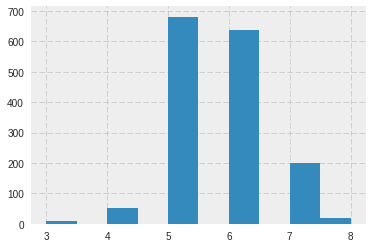

In [27]:
plt.style.use('bmh')
wqr['quality'].hist()

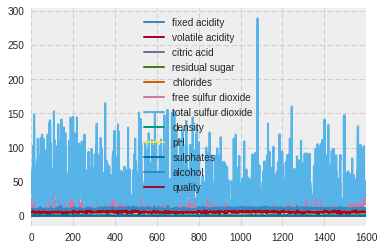

In [39]:
wqr.plot()

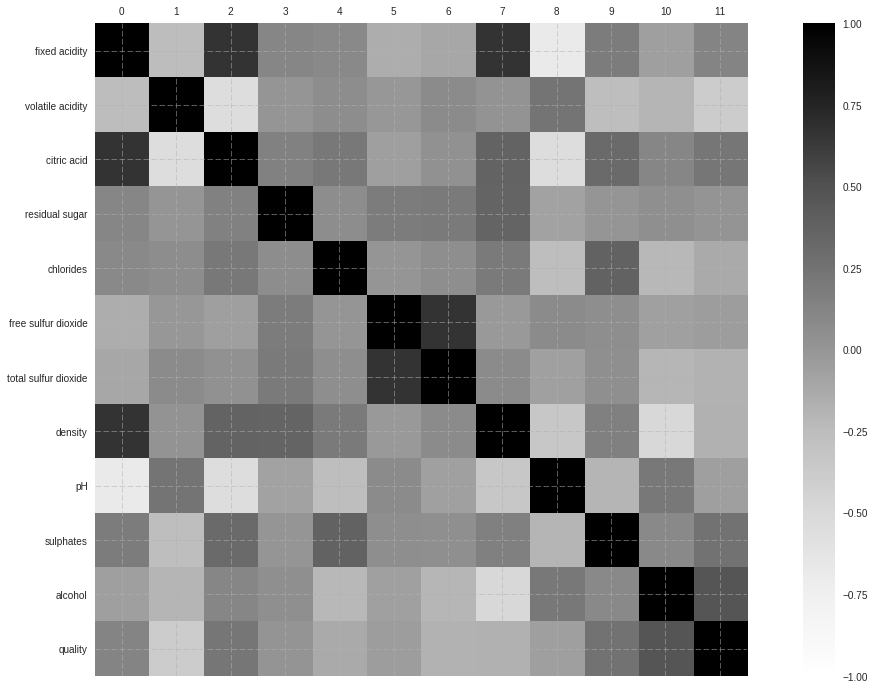

In [61]:
# Correction Matrix Plot
correlations = wqr.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(len(wqr_cols))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels()
ax.set_yticklabels(wqr_cols)
plt.show()

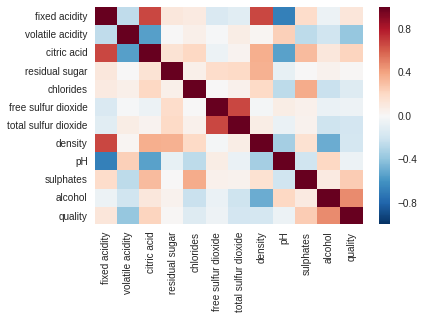

In [62]:
sns.heatmap(wqr.corr())

fixed acidity              Axes(0.125,0.536818;0.110714x0.343182)
volatile acidity        Axes(0.257857,0.536818;0.110714x0.343182)
citric acid             Axes(0.390714,0.536818;0.110714x0.343182)
residual sugar          Axes(0.523571,0.536818;0.110714x0.343182)
chlorides               Axes(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     Axes(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          Axes(0.125,0.125;0.110714x0.343182)
density                    Axes(0.257857,0.125;0.110714x0.343182)
pH                         Axes(0.390714,0.125;0.110714x0.343182)
sulphates                  Axes(0.523571,0.125;0.110714x0.343182)
alcohol                    Axes(0.656429,0.125;0.110714x0.343182)
quality                    Axes(0.789286,0.125;0.110714x0.343182)
dtype: object

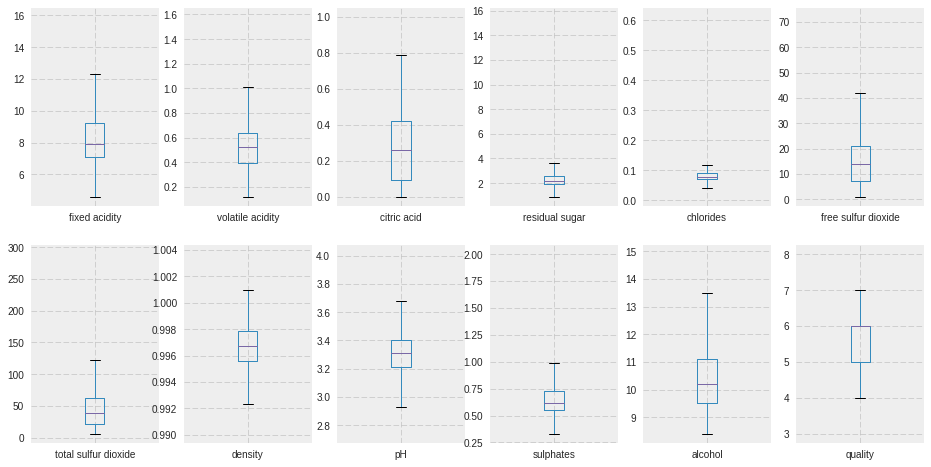

In [71]:
wqr.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False,figsize=(16,8))